Early in the twentieth century, many black populations in the United States began relocating to
urban areas. During this time, US cities were not particularly segregated (Massey and Denton
1998). However, in the decades leading up to the 1960’s, white populations left urban centers
and moved to suburban regions in the phenomenon known as “white flight”, leaving many large
cities racially segregated (Golash-Boza 2015). Federal housing organizations such as the
Federal Housing Administration and Home Owners Loan Corporation exacerbated the problem
of racial segregation by steering customers into racially homogeneous neighborhoods and
denying loans to black customers (Oliver and Shapiro 2006).
In this paper we analyze the racial demographics of Jefferson County, Kentucky, the seat of the
Louisville metropolitan area, and determine whether there is a significant correlation between a
neighborhood’s racial proportion and its proportion of home ownership. Another important
relationship is between income and home ownership. 

# Methods

Our dataset comes from the 2010 US Census and the 2010 American Community Survey. For
this project we considered only the two most populous racial categories in Louisville as defined
by the Census Bureau: White (538,714, 74.4%) and Black or African American (154,246, 21.3%).
Together these two categories comprise over 90% of Louisville’s total population of 724,441. All
data is reported per census tract, a geographical areal unit of which Louisville has 191. A census
tract in Louisville has an average population around four thousand, and we take a census tract to
represent a “neighborhood”. Each census tract acts as a single data point, and we wish to
determine the relationship between a tract’s income, home ownership, and racial proportions.


In [1]:
library(rgdal)
library(readr)
library(pracma)
library(classInt)
library(RColorBrewer)
PopData <- as.data.frame(read.csv("~/FALL 2018/MATH 560/DEC_10_SF1_SF1DP1_with_ann.csv"))
GeoRaw <- readOGR(".", "gz_2010_21_140_00_500k")
GeoData <- GeoRaw[GeoRaw$COUNTY %in% c("111"),]
GeoData <- GeoData[order(as.numeric(as.character(GeoData$NAME))),]
TotalPopVec <- PopData[2:191,156]
WhitePopVec <- PopData[2:191,158]
BlackPopVec <- PopData[2:191,160]
TotalPopVec <- as.numeric(levels(TotalPopVec))[TotalPopVec]
WhitePopVec <- as.numeric(levels(WhitePopVec))[WhitePopVec]
BlackPopVec <- as.numeric(levels(BlackPopVec))[BlackPopVec]
GeoData$proportionBLACK = c(BlackPopVec/TotalPopVec,0)
GeoData$proportionWHITE = c(WhitePopVec/TotalPopVec,0)
n = 100
palette  <- rgb(1-c(0:n)/(n+1),1-c(0:n)/(n+1),1-c(0:n)/(n+1))

Loading required package: sp
rgdal: version: 1.3-6, (SVN revision 773)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: C:/Users/Glueknob/Documents/R/win-library/3.5/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/Users/Glueknob/Documents/R/win-library/3.5/rgdal/proj
 Linking to sp version: 1.3-1 
Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source'))`


OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\Glueknob\Documents\FALL 2018\MATH 560", layer: "gz_2010_21_140_00_500k"
with 1115 features
It has 7 fields


Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

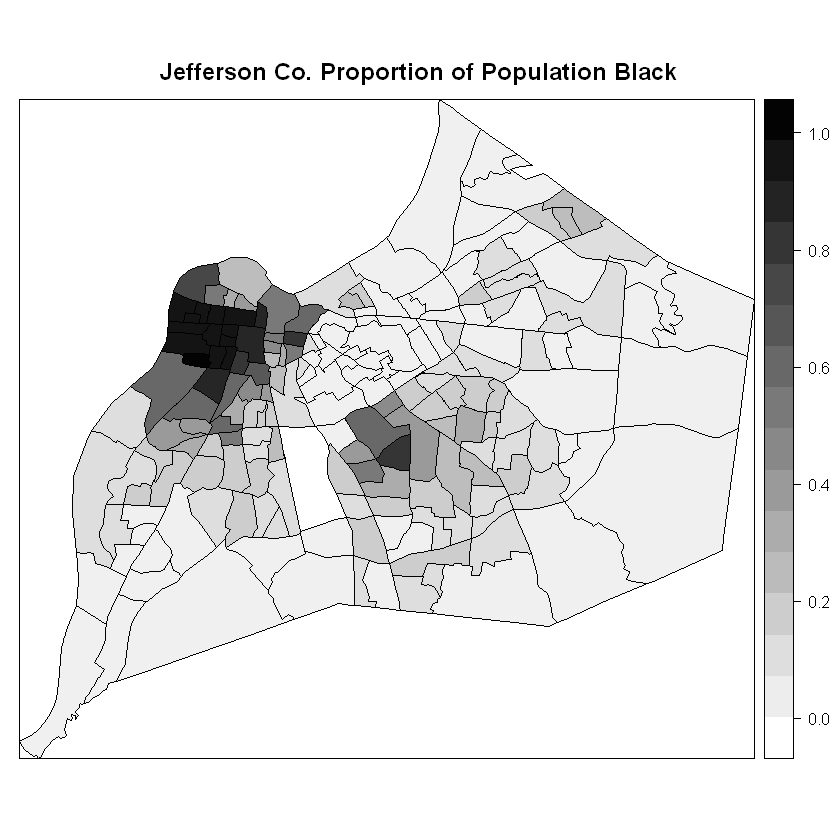

In [2]:
spplot(GeoData, z="proportionBLACK",
       t=c(0:100)/100, col.regions=palette,
       main="Jefferson Co. Proportion of Population Black")

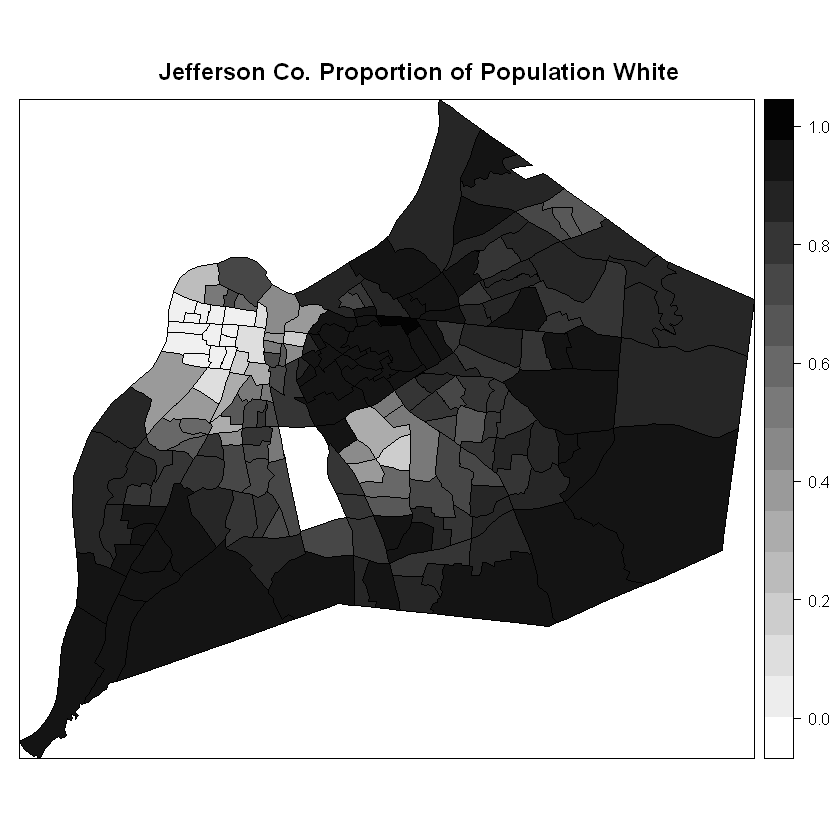

In [3]:
spplot(GeoData, z="proportionWHITE",
       t=c(0:100)/100, col.regions=palette,
       main="Jefferson Co. Proportion of Population White")

We compare the geographical distribution of these categories to the proportion of homes which
are occupied by their owner (as opposed to a renter), a statistic also reported by the US Census.
Additionally, we consider median income as a second explanatory variable to the proportion of
owner-occupied housing. Population and housing data are complete, meaning that almost all
residents of Louisville were sampled. Income data is taken from the American Community Survey,
a yearly report released by the Census Bureau with higher frequency but smaller sample size.

In [4]:
ACS_10_5YR_S1901_with_ann <- as.data.frame(read.csv("~/FALL 2018/MATH 560/ACS_10_5YR_S1901_with_ann.csv"))
Income <- ACS_10_5YR_S1901_with_ann[2:191,92]
Housing <- PopData[2:191,365]
LogIncome <- log(as.numeric(levels(Income))[Income])
Housing <- as.numeric(levels(Housing))[Housing]/100
GeoData$HOUSING <- c(Housing,0)
GeoData$LOGINCOME <- c(LogIncome,min(LogIncome))

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

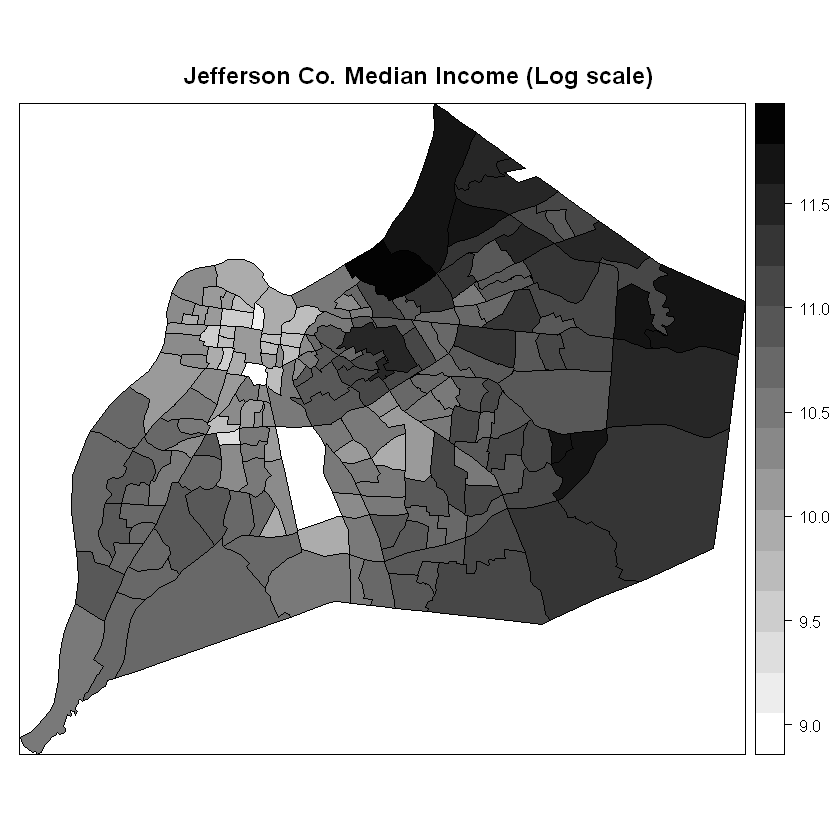

In [5]:
spplot(GeoData, z="LOGINCOME",
       col.regions=palette,
       main="Jefferson Co. Median Income (Log scale)")

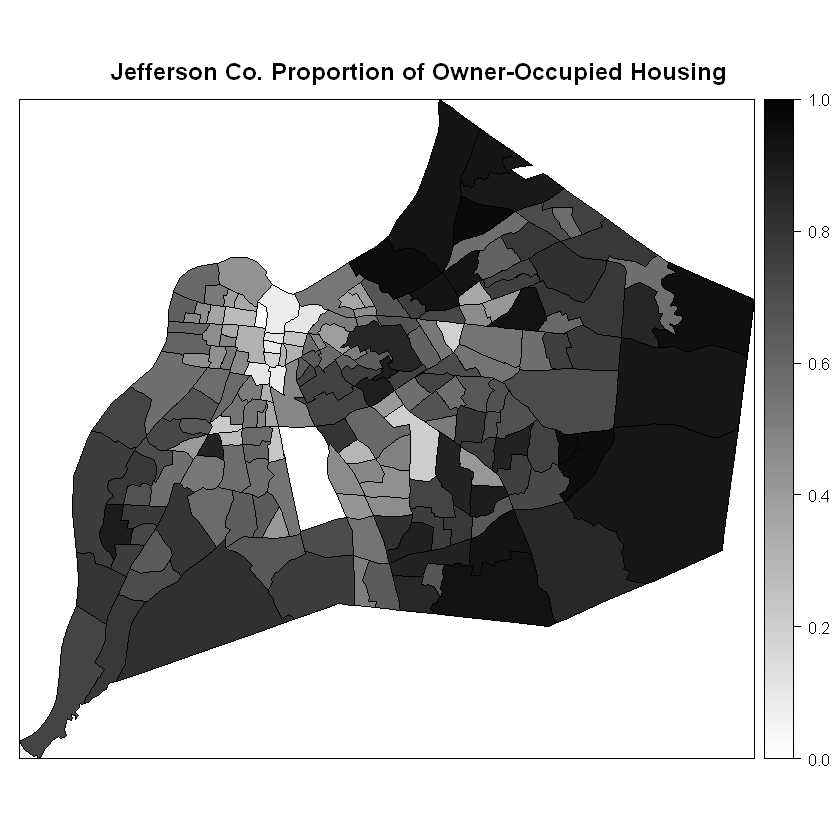

In [6]:
spplot(GeoData, z="HOUSING",
       at=c(0:100)/100 , col.regions=palette,
       main="Jefferson Co. Proportion of Owner-Occupied Housing")

First, we establish the correlation between income and home ownership, and between race and
income. This is done in both cases by applying the logarithmic transform to income in order to
achieve linearity and then performing a simple linear regression. All such calculations are
weighted according to the total population of each census tract.

For both racial categories we then perform multiple linear regression with racial proportion and
income as the independent variables and the proportion of owner-occupied housing as the
dependent variable. We take as our null hypothesis that the slope parameter associated with
racial proportion is zero.

Because the two groups comprise almost all the total population, the trend line derived for the
White proportion mirrors the trend line for Black or African American. However, due to the
presence of other racial categories, the two next most populous being Two or More Races and
Asian, we avoid utilizing this observation and consider each category separately. Finally, we note
that because racial proportion and log of income are correlated, in our multiple linear correlation
we have violated the condition of no multicollinearity. However, this violation does not completely
nullify the multiple linear regression model, and only makes the estimation of the regression
parameters (intercept and slope) less accurate

# Results

We observed significant positive correlation between the log of a census tract’s median income
and the proportion of home ownership in the tract, with weights corresponding to the total
population of each tract. We used Pearson product moment correlation coefficient and found
$r = .811$ and $p< .01$. The line of best fit is $\hat{y} = 9.473 + 1.946 \log x$ where $x$ denotes the median
income of a census tract and $\hat{y}$ its predicted proportion of home ownership (see Figure 3).

We also observed significant positive correlation between the proportion White in a census tract
and the log of the tract’s median income with $r = .711$ and $p < .01$, along with significant negative
correlation between the proportion of Black or African American and log of income with $r = −.702$
and $p < .01$. For whites we found the regression line $\log\hat{y} = 9.662 + 1.420x$ and for Black of
African American the regression line $\log\hat{y} = 11.017 − 1.399x$ where $\hat{y}$ denotes median income
and $x$ the racial proportion in each case (Figure 3).

With these results in mind, we analyze the combined effect of both racial proportions and median
income on a census tract’s rate of home ownership. We take as the null hypothesis that income
is the primary explanatory variable for a tract’s home ownership, i.e. that racial proportions have
no effect on home ownership after controlling for income. As a linear model, we write $\hat{y} = \beta_0 +
\beta_1x_1 + \beta_2x_2 + \epsilon$, where $\hat{y}$ denotes the rate of home ownership, $x_1$ the median income of a census
tract, $x_2$ the proportion of a given racial category in a census tract (we consider each group
separately), and $\epsilon$ the error term. Then our null hypothesis is that the slope parameter $\beta_2 = 0$:

$$H_0 : \text{there is no significant correlation between a census tract's racial proportions}$$
$$\text{and rates of home ownership after controlling for median income ($\alpha = .01$)}$$

In [17]:
cor.test(LogIncome, Housing, weights = Total)


	Pearson's product-moment correlation

data:  LogIncome and Housing
t = 19.041, df = 188, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7565374 0.8550722
sample estimates:
      cor 
0.8114962 


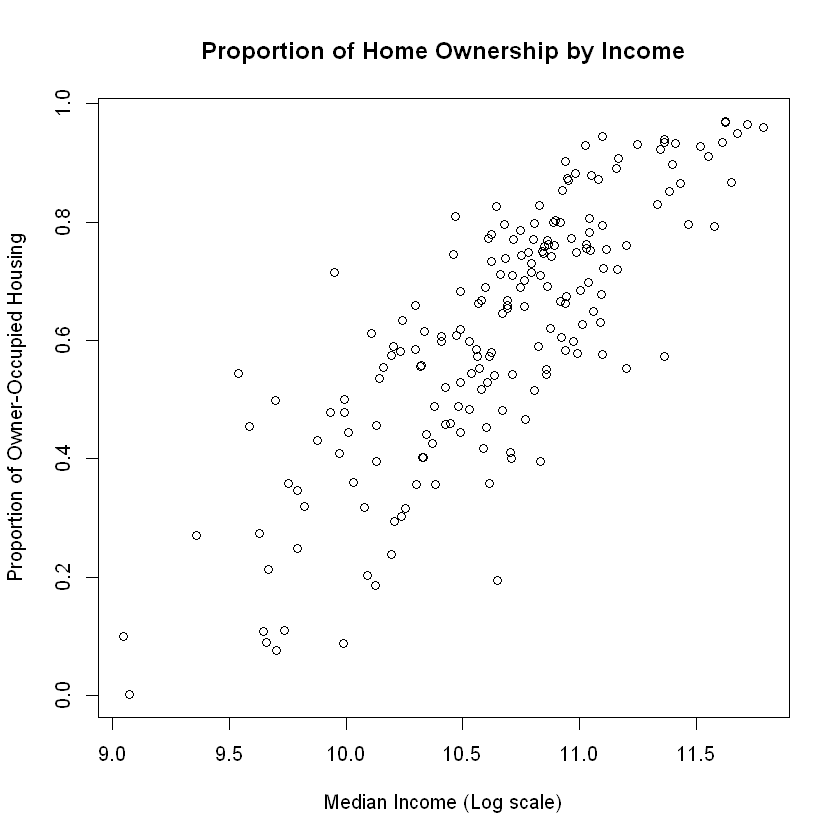

In [16]:
plot(LogIncome, Housing,
    main = "Proportion of Home Ownership by Income",
    xlab = "Median Income (Log scale)", ylab = "Proportion of Owner-Occupied Housing")

In [18]:
cor.test(WhitePopVec/TotalPopVec, LogIncome, weights = Total)


	Pearson's product-moment correlation

data:  WhitePopVec/TotalPopVec and LogIncome
t = 13.877, df = 188, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6330833 0.7751880
sample estimates:
      cor 
0.7113304 


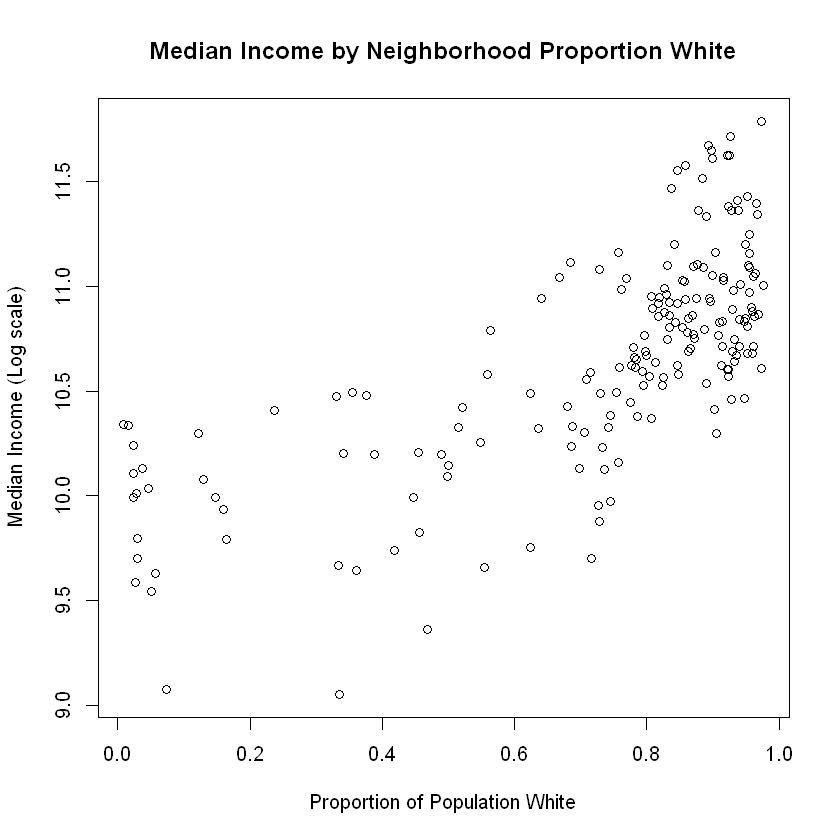

In [8]:
plot(WhitePopVec/TotalPopVec, LogIncome,
    main = "Median Income by Neighborhood Proportion White",
    xlab = "Proportion of Population White", ylab = "Median Income (Log scale)")

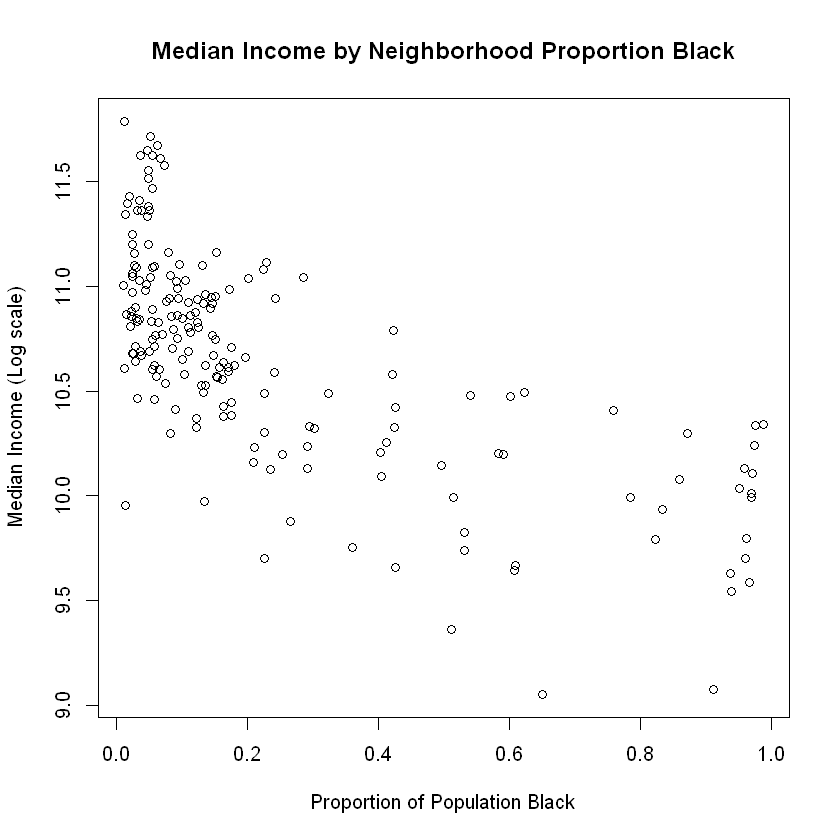

In [9]:
plot(BlackPopVec/TotalPopVec, LogIncome,
    main = "Median Income by Neighborhood Proportion Black",
    xlab = "Proportion of Population Black", ylab = "Median Income (Log scale)")

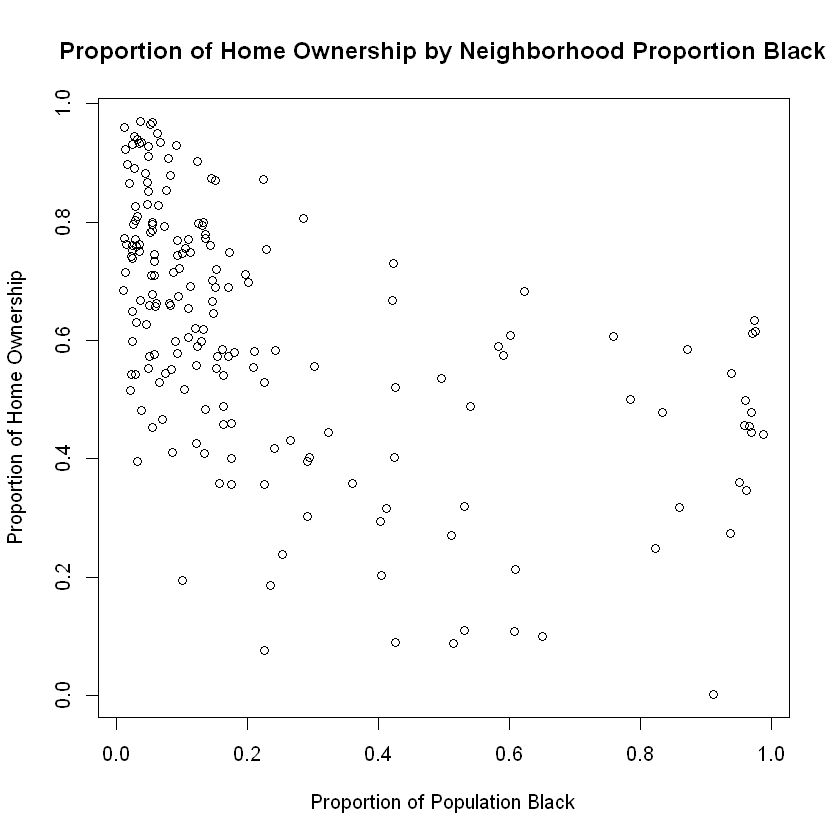

In [10]:
plot(BlackPopVec/TotalPopVec, Housing,
    main = "Proportion of Home Ownership by Neighborhood Proportion Black",
    xlab = "Proportion of Population Black", ylab = "Proportion of Home Ownership")

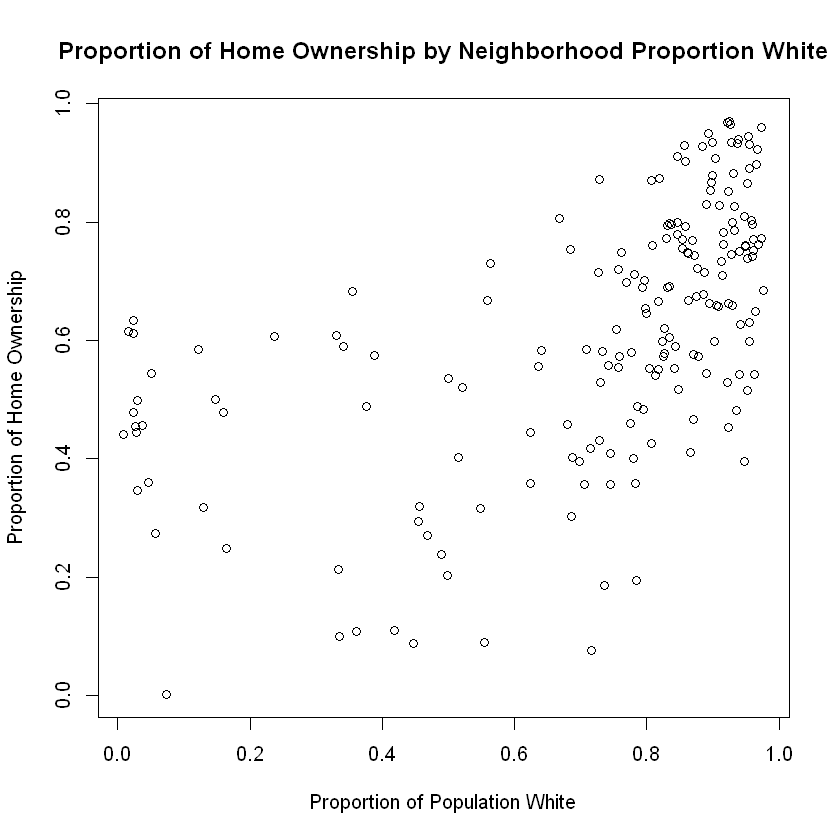

In [11]:
plot(WhitePopVec/TotalPopVec, Housing,
    main = "Proportion of Home Ownership by Neighborhood Proportion White",
    xlab = "Proportion of Population White", ylab = "Proportion of Home Ownership")

For the White racial category our multiple linear regression model found that log of median income
is a significant factor in a tract’s proportion of home ownership, with a $t$-test statistic of $t = 13.502$
and $p < .01$. The proportion White, however, did not pass a significance test at level $\alpha = .01$ with
a $t$-test statistic of $t=-0.048$. Similarly, when expressing the rate of home ownership as a
combination of log of median income and proportion Black or African American, we found that
income is a significant factor with test statistic $t = 14.351$ and $p < .01$, but proportion Black or
African American did not pass a significance test at level $\alpha = .01$ with a test statistic of $t = 1.101$.
Thus, we fail to reject the null hypothesis that racial proportions are a significant factor in the
proportion of owner-occupied housing.

# Conclusion

Using data from the 2010 US Census, we found significant evidence that the racial proportion of
a census tract is significantly correlated with that tract’s income. For the White racial category,
this correlation is positive, while for Black or African American, the correlation is negative. We
expected this trend to hold but were surprised by the strength of the correlation. In both racial
categories the correlation with income had a $R^2$ value greater than 50%.

We analyzed rates of home ownership as compared to median income and found a strong positive
correlation. Our multiple linear regression failed to detect any variability in home ownership as
explained by race after controlling for income. One caveat of our analysis is the modifiable areal
unit problem (MAUP), which describes the variance in statistical results based on the arbitrary
choice of geographic regions, in this case the census tracts. We hope that the Census Bureau
has accounted for MAUP and that tracts are designed to minimize this problem.

# References

Goetz, Edward G. (2013) New Deal Ruins: Race, Economic Justice, and Public Housing Policy. New
York: Cornell University Press

Golash-Boza, T. M. (2015). Race & Racisms: A Critical Approach. New York: Oxford University Press.

Massey, Douglas, and Nancy Denton. (1998). American Apertheid: Segregation and the Making of the
Underclass. Cambridge, MA: Harvard University Press.

Oliver, Melvin and Thomas Shapiro. (2006). Black Wealth / White Wealth: A New Perspective on Racial
Inequality. New York: Routledge.

Shapiro et al. (2013). The Roots of the Widening Racial Wealth Gap: Explaining the Black-White
Economic Divide. Retrieved from https://iasp.brandeis.edu/pdfs/Author/shapiro-thomasm/racialwealthgapbrief.pdf

Spatial Structures in the Social Sciences, Brown University. Residential Segregation. Retrieved from
https://s4.ad.brown.edu/projects/diversity/segregation2010/Default.aspx

United States Census Bureau. (2010). 2006-2010 American Community Survey 5-Year Estimates:
Education Attainment. Retrieved from https://factfinder.census.gov/faces/affhelp/jsf/pages/
metadata.xhtml?lang=en&type=dataset&id=dataset.en.ACS_10_5YR

United States Census Bureau. (2010). Profile of General Population and Housing Characteristics: 2010.
Retrieved from https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?
pid=DEC_10_SF1_SF1DP1&prodType=table